In [1]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

max_features = 10000
max_len = 20

(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=max_features)

train_data = pad_sequences(train_data, maxlen=max_len)
test_data = pad_sequences(test_data, maxlen=max_len)

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Embedding

model = Sequential()

model.add(Embedding(max_features, 8, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

history = model.fit(train_data, train_labels, epochs=20, batch_size=32, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 1s 56us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/20
20000/20000 [==============================] - 1s 47us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/20
20000/20000 [==============================] - 1s 47us/step - loss: 0.4752 - acc: 0.7808 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/20
20000/20000 [==============================] - 1s 47us/step - loss: 0.4263 - acc: 0.8077 - val_loss: 0.5008 - val_acc: 0.7452
Epoch 5/20
20000/20000 [==============================] - 1s 46us/step - loss: 0.3930 - acc: 0.8258 - val_loss: 0.4981 - val_acc: 0.7538
Epoch 6/20
20000/20000 [==============================] - 1s 47us/step - loss: 0.3668 - acc: 0.8395 - val_loss: 0.5014 - val_acc: 0.7530
Epoch 7/20
20000/20000 [==============================] - 1s 47us/step - loss: 0.3435 - acc: 0.8533 - val_loss: 0.5052 - val_acc:

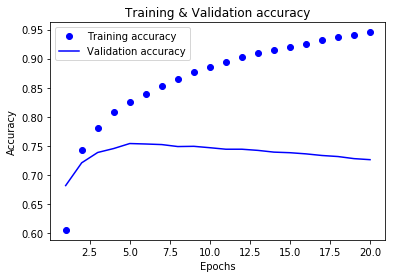

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
history_dict.keys()

epochs = range(1,21)

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values,'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values,'b', label='Validation accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Reivews classification using GloVe embedding

In [4]:
import os 
imdb_dir = './aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg','pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
                
print(set(labels))
print(texts[0])

{0, 1}
Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.


In [5]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
train_samples = 200
val_samples = 1000
max_words = 10000

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('found {} unique words'.format(len(word_index)))

data = pad_sequences(sequences , maxlen=maxlen)
labels = np.asarray(labels)
print('shape of data: ', data.shape)
print('shape of labels: ', labels.shape)

indices = np.arange(25000)
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_samples]
y_train = labels[:train_samples]
x_val = data[train_samples: train_samples+val_samples]
y_val = labels[train_samples: train_samples+val_samples]

print('shape of data: ', x_train.shape)
print('shape of labels: ', y_train.shape)
print(y_train)
print(y_val)

found 88582 unique words
shape of data:  (25000, 100)
shape of labels:  (25000,)
shape of data:  (200, 100)
shape of labels:  (200,)
[1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0
 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1
 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1
 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0]
[0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1
 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1
 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0
 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1
 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1
 1 1 0 1 0

In [6]:
glove_dir = './glove.6B'
embedding_index = {}

f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embedding_index[word] = coefs
f.close()

print('found {} word vectors'.format(len(embedding_index)))

found 400000 word vectors


In [7]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words,embedding_dim))

for word,i in word_index.items():
    if i<max_words :
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [8]:
from keras.models import Sequential
from keras.layers import Embedding,Dense,Flatten

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].set_trainable = False

In [10]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 1000 samples
Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 1.5121 - acc: 0.5450 - val_loss: 1.0580 - val_acc: 0.5130
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 0.5813 - acc: 0.7150 - val_loss: 0.9139 - val_acc: 0.4910
Epoch 3/10
200/200 [==============================] - 0s 1ms/step - loss: 0.6290 - acc: 0.6750 - val_loss: 0.8871 - val_acc: 0.5230
Epoch 4/10
200/200 [==============================] - 0s 1ms/step - loss: 0.1863 - acc: 0.9650 - val_loss: 1.3534 - val_acc: 0.5160
Epoch 5/10
200/200 [==============================] - 0s 1ms/step - loss: 0.1570 - acc: 0.9450 - val_loss: 0.7413 - val_acc: 0.5430
Epoch 6/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0570 - acc: 1.0000 - val_loss: 0.8025 - val_acc: 0.5250
Epoch 7/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0470 - acc: 1.0000 - val_loss: 1.2013 - val_acc: 0.5020
Epoch 8/10
200/200 [=========

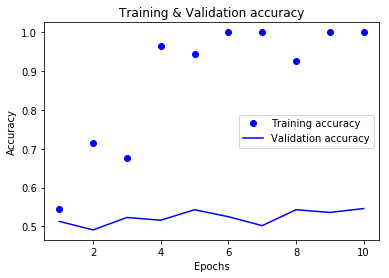

In [11]:
history_dict = history.history
history_dict.keys()

epochs = range(1,11)

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values,'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values,'b', label='Validation accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [12]:
from keras.models import Sequential
from keras.layers import Embedding,Dense,Flatten

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))


Train on 200 samples, validate on 1000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6908 - acc: 0.5350 - val_loss: 0.6946 - val_acc: 0.5170
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 0.5077 - acc: 0.9850 - val_loss: 0.7070 - val_acc: 0.5130
Epoch 3/10
200/200 [==============================] - 0s 1ms/step - loss: 0.3002 - acc: 0.9900 - val_loss: 0.7154 - val_acc: 0.5180
Epoch 4/10
200/200 [==============================] - 0s 1ms/step - loss: 0.1472 - acc: 1.0000 - val_loss: 0.7207 - val_acc: 0.5220
Epoch 5/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0718 - acc: 1.0000 - val_loss: 0.7329 - val_acc: 0.5240
Epoch 6/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0374 - acc: 1.0000 - val_loss: 0.7383 - val_acc: 0.5250
Epoch 7/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0199 - acc: 1.0000 - val_loss: 0.7464 - val_acc: 0.5300
Epoch 8/10
200/200 [=========

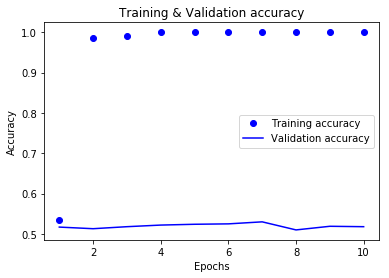

In [14]:
history_dict = history.history
history_dict.keys()

epochs = range(1,11)

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values,'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values,'b', label='Validation accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [15]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg','pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences , maxlen=maxlen)
y_test = np.asarray(labels)

In [16]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test,y_test)

25000/25000 [==============================] - 2s 66us/step


[0.89140827146530155, 0.54452]